### Séries Temporais

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [2]:
dataset = pd.read_csv('Arquivos/AirPassengers.csv')

In [3]:
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
dateparse = lambda dates: pd.datetime.strptime(dates,'%Y-%m')
dataset = pd.read_csv('Arquivos/AirPassengers.csv', parse_dates= ['Month'], index_col = 'Month', date_parser=dateparse)

C:\Users\vitao\AppData\Local\Temp\ipykernel_25264\1606283493.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates,'%Y-%m')


In [6]:
dataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
time_series = dataset['#Passengers']

In [8]:
time_series

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

### Decomposição da Série Temporal

In [9]:
decomposicao = seasonal_decompose(time_series)
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

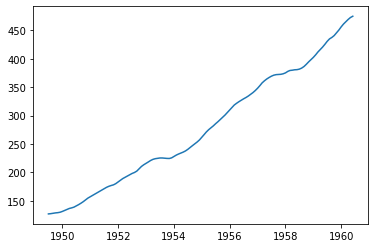

In [10]:
plt.plot(tendencia)

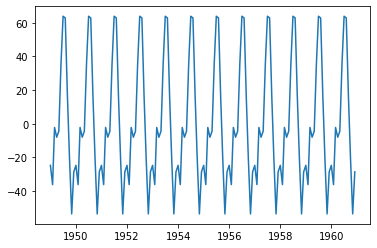

In [11]:
plt.plot(sazonal)

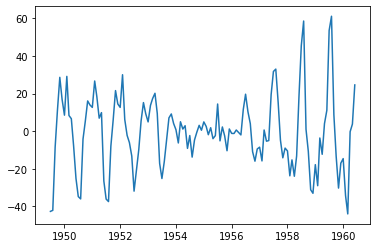

In [12]:
plt.plot(aleatorio)

### Previsões com ARIMA

In [13]:
# Parametros P, Q e D
model = auto_arima(time_series, order=(2,1,2))

In [14]:
prediction = model.predict(n_periods=12)

In [15]:
prediction

array([467.57385422, 490.49466005, 509.13704051, 492.55484318,
       495.30599617, 475.94779994, 476.33982396, 475.55213122,
       472.35384315, 483.88970811, 475.57024179, 485.92158703])

### Etapa 7 - Gráfico das previsões

In [16]:
len(time_series)

144

In [17]:
train = time_series[:130]
train.shape

(130,)

In [18]:
train.index.min(), train.index.max()

(Timestamp('1949-01-01 00:00:00'), Timestamp('1959-10-01 00:00:00'))

In [19]:
test = time_series[130:]
test.shape

(14,)

In [20]:
model2 = auto_arima(train)

In [22]:
prediction = pd.DataFrame(model2.predict(n_periods=14), index=test.index)
prediction.columns = ['passengers_predictions']
prediction

,passengers_predictions
Month,
1959-11-01,357.690515
1959-12-01,334.857456
1960-01-01,342.488598
1960-02-01,375.944535
1960-03-01,424.126291
1960-04-01,473.151449
1960-05-01,510.388386
1960-06-01,527.724250
1960-07-01,523.268339


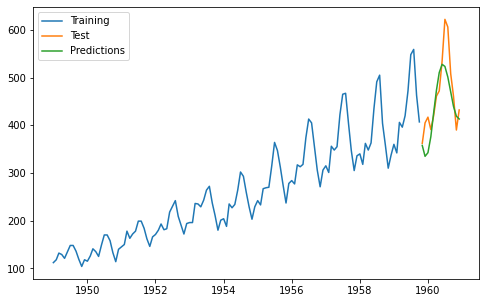

In [23]:
plt.figure(figsize=(8,5))
plt.plot(train, label = 'Training')
plt.plot(test, label = 'Test')
plt.plot(prediction, label = 'Predictions')
plt.legend();

### Série temporal com Facebook Prophet - previsão de visualização diária de páginas web

In [ ]:
from fbprophet import Prophet
import pandas as pd

In [ ]:
dataset = pd.read_csv('Arquivos/page_wikipedia.csv')
dataset

In [ ]:
dataset.describe()

In [ ]:
dataset.hist()

In [ ]:
dataset = dataset[['date','views']].rename(coumns = {'date': 'ds', 'view': 'y'})
dataset

In [ ]:
dataset = dataset.sort_values(by = 'ds')
dataset

In [ ]:
model = Prophet()
model.fit(dataset)

In [ ]:
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

In [ ]:
forecast.head()

In [ ]:
len(dataset), len(forecast)

In [ ]:
len(forecast) - len(dataset)

In [ ]:
forecast.tail(90)

In [ ]:
model.plot(forecast, xlabel = 'Date', ylabel = 'Views');

In [ ]:
model.plot_components(forecast);

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [ ]:
plot_plotly(model, forecast)

In [ ]:
plot_components_plotly(model, forecast)